In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import sph_harm

In [59]:
vmax, vmin = -1.0, 1.0
amplitude = 1/10

Ntheta = 101
Nphi = 101

th = np.linspace(0., np.pi, Ntheta)
ph = np.linspace(-np.pi, np.pi, Nphi)
Th, Ph = np.meshgrid(th, ph)

In [60]:
def plot_sph_harm(s, phase=0.0, cmap="seismic", view=None, ax=None, **plot_kwargs):
    if view is None:
        view = (35.0, 45.0)

    if ax is None:
        fig = plt.gcf()
        ax = fig.add_subplot(projection='3d')
    
    dr = s*np.sin(phase)*amplitude
    x = (1.+dr)*np.sin(Th)*np.cos(Ph)
    y = (1.+dr)*np.sin(Th)*np.sin(Ph)
    z = (1.+dr)*np.cos(Th)
    v = s/(vmax - vmin)
    
    v = v*np.sin(phase)  # displacement
    v += 0.5

    surf = ax.plot_surface(x, y, z,
                           facecolors=plt.cm.get_cmap(cmap)(v),
                           **plot_kwargs)

    ax.set_xlim(-0.9,0.9)
    ax.set_ylim(-0.9,0.9)
    ax.set_zlim(-0.9,0.9)
    ax.axis("off")
    ax.view_init(*view)
    return ax

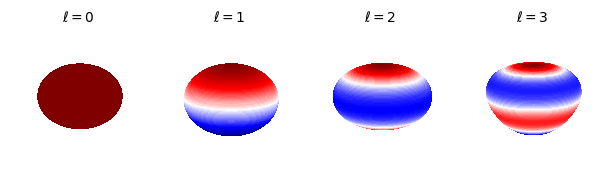

In [65]:
plot_kwargs = {'rstride': 1,
               'cstride': 1,
               'linewidth': 0,
               'antialiased': False,
               'rasterized': True,
               'shade': False}

fig = plt.figure(figsize=(6.2, 2.2))

emm = 0
view = (15., 45.)
phase = 3*np.pi/2
for ell in range(4):
    s = sph_harm(emm, ell, Ph, Th).real
    s = s / np.max(s)
    
    ax = fig.add_subplot(1, 4, ell+1, projection='3d')
    ax = plot_sph_harm(s, phase=phase, ax=ax, view=view, **plot_kwargs)
    ax.set_title(rf"$\ell={ell}$", fontsize="medium")

fig.tight_layout()
fig.savefig("../figures/spherical_harmonics.pdf", format="pdf", dpi=300)

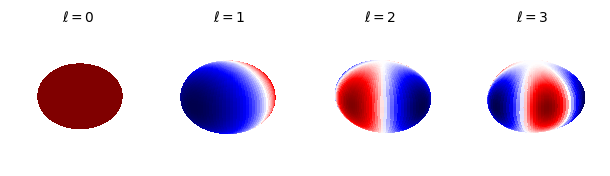

In [67]:
fig = plt.figure(figsize=(6.2, 2.2))

view = (15., 45.)
phase = 3*np.pi/2
for ell in range(4):
    s = sph_harm(ell, ell, Ph, Th).real
    s = s / np.max(s)
    
    ax = fig.add_subplot(1, 4, ell+1, projection='3d')
    ax = plot_sph_harm(s, phase=phase, ax=ax, view=view, **plot_kwargs)
    ax.set_title(rf"$\ell={ell}$", fontsize="medium")
fig.tight_layout()